In [1]:
ord("V") % 3 + 1

3

In [2]:
import csv
import numpy as np

def get_column_values(filename, column_name):
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        
        column_index = header.index(column_name)
        
        data = np.array(list(reader))
        
    return data[:, column_index]

In [3]:
arrAPC = get_column_values('/home/vlad_322/Downloads/russia_losses_equipment.csv', 'APC')

print(arrAPC)

['17476' '17438' '17396' '17344' '17304' '17292' '17252' '17222' '17170'
 '17132' '17093' '17080' '17077' '17071' '17063' '17043' '17003' '16955'
 '16938' '16925' '16906' '16897' '16878' '16878' '16869' '16848' '16821'
 '16786' '16760' '16736' '16722' '16699' '16681' '16667' '16648' '16631'
 '16620' '16599' '16567' '16542' '16521' '16495' '16480' '16473' '16461'
 '16426' '16402' '16385' '16368' '16363' '16350' '16341' '16332' '16323'
 '16294' '16286' '16255' '16238' '16211' '16203' '16161' '16141' '16103'
 '16095' '16074' '16050' '16039' '16013' '16000' '15980' '15963' '15917'
 '15902' '15883' '15871' '15862' '15826' '15811' '15779' '15755' '15732'
 '15715' '15704' '15685' '15645' '15629' '15611' '15600' '15583' '15566'
 '15550' '15524' '15505' '15480' '15459' '15450' '15431' '15413' '15398'
 '15383' '15372' '15337' '15319' '15307' '15287' '15269' '15263' '15234'
 '15208' '15187' '15176' '15144' '15131' '15105' '15096' '15076' '15036'
 '15020' '15002' '14980' '14947' '14935' '14913' '1

In [4]:
def convert_to_int(arr):
    return np.array(arr, dtype=int)

def calculate_daily_losses(arr):
    arr_len = len(arr)
    if arr_len == 0:
        return np.array([])
    
    if arr_len == 1:
        return arr

    daily_losses = np.concatenate((arr[:-1] - arr[1:], [arr[arr_len - 1]]))
    
    return np.maximum(daily_losses, 0)

arrAPC = get_column_values('/home/vlad_322/Downloads/russia_losses_equipment.csv', 'APC')
arrDay = get_column_values('/home/vlad_322/Downloads/russia_losses_equipment.csv', 'day')

arrAPC_int = convert_to_int(arrAPC)
daily_losses_of_APC = calculate_daily_losses(arrAPC_int)

for i in range(len(daily_losses_of_APC)):
    print(f"День {arrDay[i]}: {daily_losses_of_APC[i]}")

День 949: 38
День 948: 42
День 947: 52
День 946: 40
День 945: 12
День 944: 40
День 943: 30
День 942: 52
День 941: 38
День 940: 39
День 939: 13
День 938: 3
День 937: 6
День 936: 8
День 935: 20
День 934: 40
День 933: 48
День 932: 17
День 931: 13
День 930: 19
День 929: 9
День 928: 19
День 927: 0
День 926: 9
День 925: 21
День 924: 27
День 923: 35
День 922: 26
День 921: 24
День 920: 14
День 919: 23
День 918: 18
День 917: 14
День 916: 19
День 915: 17
День 914: 11
День 913: 21
День 912: 32
День 911: 25
День 910: 21
День 909: 26
День 908: 15
День 907: 7
День 906: 12
День 905: 35
День 904: 24
День 903: 17
День 902: 17
День 901: 5
День 900: 13
День 899: 9
День 898: 9
День 897: 9
День 896: 29
День 895: 8
День 894: 31
День 893: 17
День 892: 27
День 891: 8
День 890: 42
День 889: 20
День 888: 38
День 887: 8
День 886: 21
День 885: 24
День 884: 11
День 883: 26
День 882: 13
День 881: 20
День 880: 17
День 879: 46
День 878: 15
День 877: 19
День 876: 12
День 875: 9
День 874: 36
День 873: 15
День 872: 32
Д

In [5]:
def get_top_losses(arr, n = 5):
    return np.unique(np.sort(arr)[-n:])

top_losses = get_top_losses(daily_losses_of_APC)

print("5 найбільших добових втрат БТР:", top_losses)

5 найбільших добових втрат БТР: [ 96 110 120 190 516]


In [6]:
arrDay_int = convert_to_int(arrDay)

summer_range_2023 = (arrDay_int >= 463) & (arrDay_int <= 554)

total_losses_in_range = np.sum(daily_losses_of_APC[summer_range_2023])

print(f"Загальна кількість БТР, знищених влітку 2023 року: {total_losses_in_range}")

Загальна кількість БТР, знищених влітку 2023 року: 1132


In [7]:
range_100_500 = (arrDay_int >= 100) & (arrDay_int < 500)

losses_in_range = daily_losses_of_APC[range_100_500]

average_losses = np.mean(losses_in_range)

print(f"Середнє значення знищених БТР за 100-500 днів війни: {average_losses}")

Середнє значення знищених БТР за 100-500 днів війни: 11.51


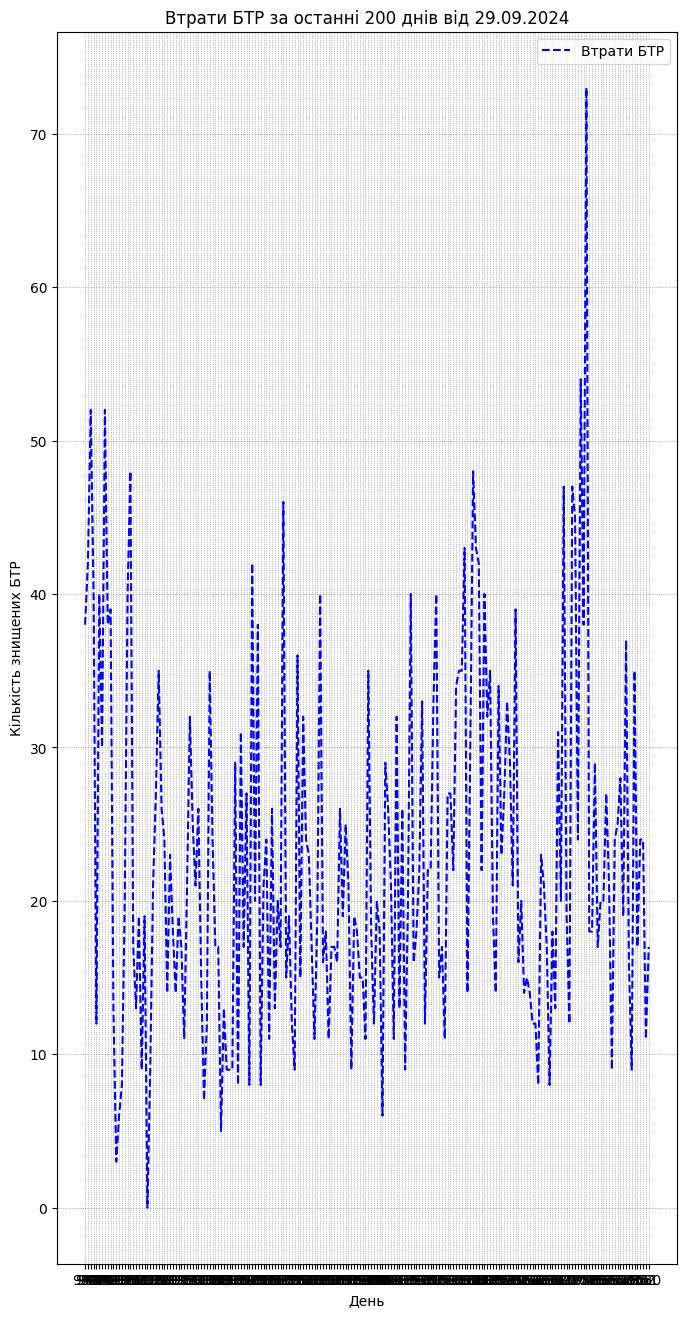

In [8]:
import matplotlib.pyplot as plt

last_200_days = arrDay[:200]
last_losses = daily_losses_of_APC[:200]

plt.figure(figsize=(8, 16), dpi=100)

plt.plot(last_200_days, last_losses, linestyle='--', color='blue', label='Втрати БТР')

# Подписи графика
plt.title('Втрати БТР за останні 200 днів від 29.09.2024')
plt.xlabel('День')
plt.ylabel('Кількість знищених БТР')

# Добавление сетки
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Легенда
plt.legend()

# Сохранение графика в файл
plt.savefig('/home/vlad_322/Downloads/losses_BTR_last_200_days.png')

# Отображение графика
plt.show()